In [1]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#importing the dataset
df=pd.read_excel('Hospital_Costs.xlsx')

In [3]:
# read first five columns in data
df.head()

,AGE,FEMALE,LOS,RACE,TOTCHG,APRDRG
0,17,1,2,1.0,2660,560
1,17,0,2,1.0,1689,753
2,17,1,7,1.0,20060,930
3,17,1,1,1.0,736,758
4,17,1,1,1.0,1194,754


In [4]:
df.shape

(500, 6)

In [5]:
# data type of each column
df.dtypes

AGE         int64
FEMALE      int64
LOS         int64
RACE      float64
TOTCHG      int64
APRDRG      int64
dtype: object

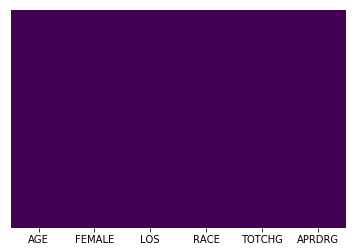

In [6]:
## Check for null values

sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [7]:
## check null values
df.isnull().sum()

AGE       0
FEMALE    0
LOS       0
RACE      1
TOTCHG    0
APRDRG    0
dtype: int64

In [8]:
df.RACE.value_counts()

1.0    484
2.0      6
5.0      3
4.0      3
6.0      2
3.0      1
Name: RACE, dtype: int64

### filling the Nan value with pad method

In [9]:
df.fillna(method='pad',inplace = True)

In [10]:
df.isnull().sum()

AGE       0
FEMALE    0
LOS       0
RACE      0
TOTCHG    0
APRDRG    0
dtype: int64

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
AGE,500.0,5.086,6.949474,0.0,0.00,0.0,13.00,17.0
FEMALE,500.0,0.512,0.500357,0.0,0.00,1.0,1.00,1.0
LOS,500.0,2.828,3.363487,0.0,2.00,2.0,3.00,41.0
RACE,500.0,1.078,0.514242,1.0,1.00,1.0,1.00,6.0
TOTCHG,500.0,2774.388,3888.407367,532.0,1216.25,1536.5,2530.25,48388.0
APRDRG,500.0,616.360,178.316044,21.0,640.00,640.0,751.00,952.0


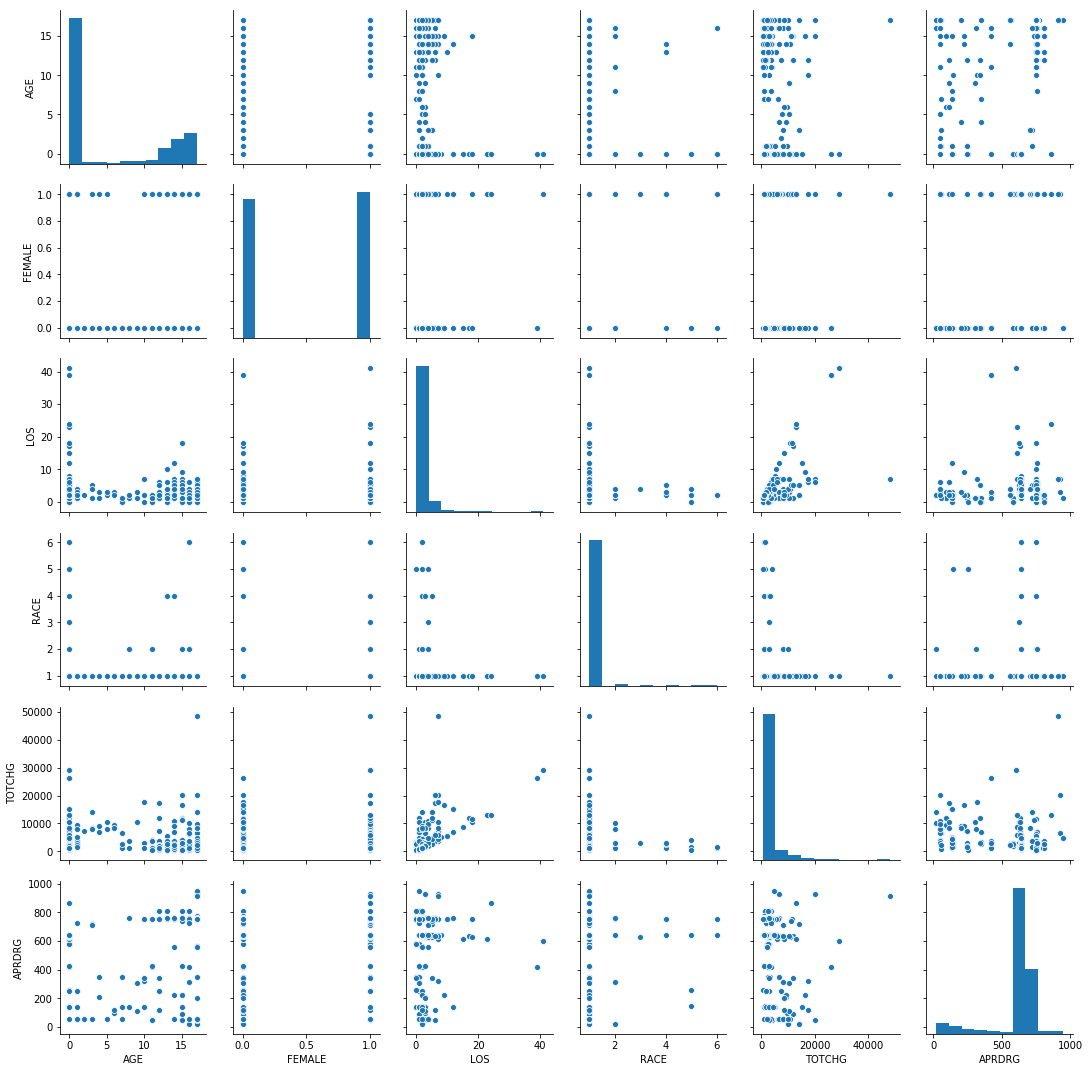

In [12]:
sns.pairplot(df)

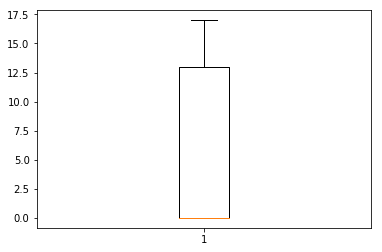

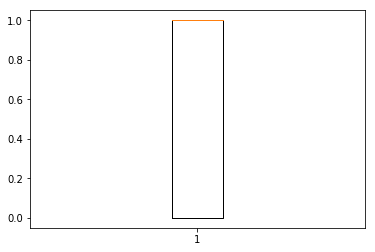

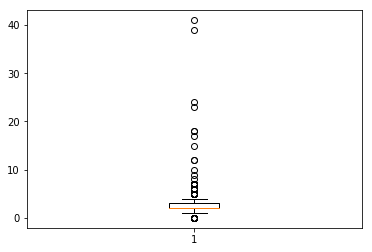

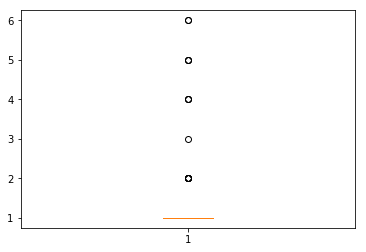

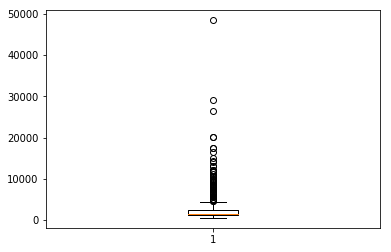

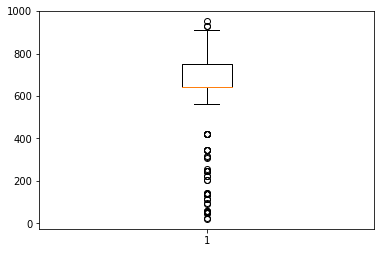

In [13]:
#outliers:
for i in range(len(df.columns)):
    plt.boxplot(df.iloc[:,i])
    plt.show()

In [14]:
df.corr()

,AGE,FEMALE,LOS,RACE,TOTCHG,APRDRG
AGE,1.000000,0.233979,-0.068640,0.016064,0.131680,0.147497
FEMALE,0.233979,1.000000,0.035761,-0.038693,-0.060195,0.252863
LOS,-0.068640,0.035761,1.000000,-0.017718,0.623193,0.005059
RACE,0.016064,-0.038693,-0.017718,1.000000,-0.018034,-0.043775
TOTCHG,0.131680,-0.060195,0.623193,-0.018034,1.000000,-0.330001
APRDRG,0.147497,0.252863,0.005059,-0.043775,-0.330001,1.000000


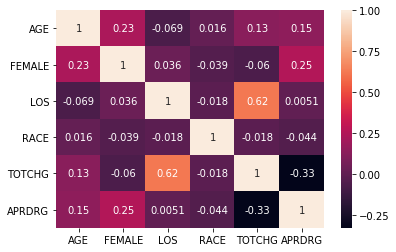

In [15]:
sns.heatmap(df.corr(), annot = True)

- **There is no strong correlation between the variables**
- `TOTCHG` is correlated with `LOS`
- `TOTCHG` is some what correlated with `APRDRG`

### The combination bar graph with AGE, TOTCHG and FEMALE

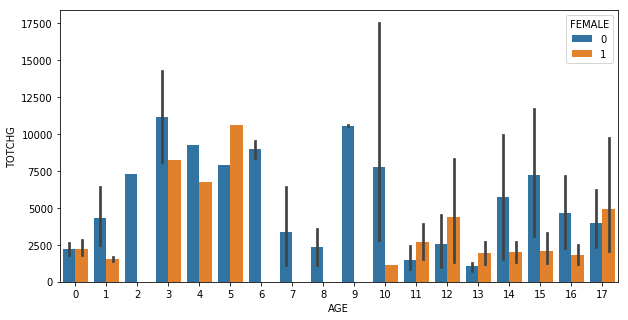

In [16]:
plt.figure(figsize=(10,5))
sns.barplot(x = df.AGE, y = df.TOTCHG, hue = df.FEMALE)
plt.show()

### The combination graph with AGE and TOTCHG

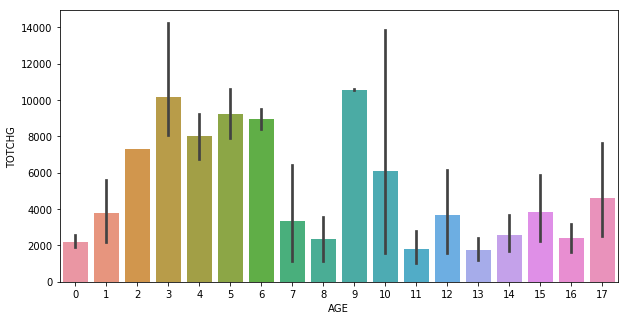

In [17]:
plt.figure(figsize=(10,5))
sns.barplot(x = df.AGE, y = df.TOTCHG)
plt.show()

### The combination graph with TOTCHG and LOS

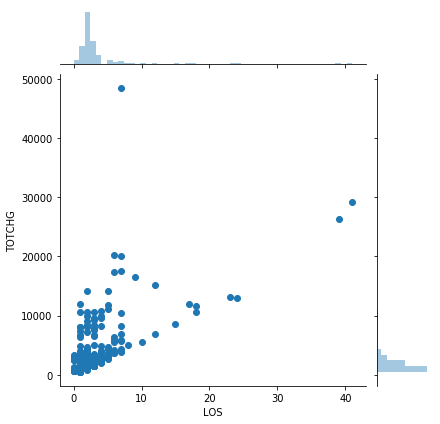

In [18]:
sns.jointplot(x = 'LOS',y = 'TOTCHG',data = df,kind = 'scatter')

### The combination graph with TOTCHG and APRDRG

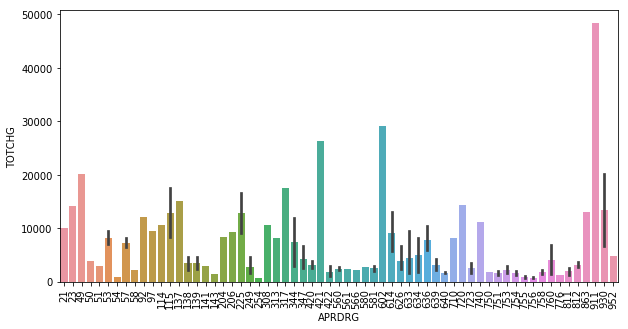

In [19]:
plt.figure(figsize=(10,5))
sns.barplot(x = 'APRDRG',y = 'TOTCHG',data = df)
plt.xticks(rotation=90)
plt.show()

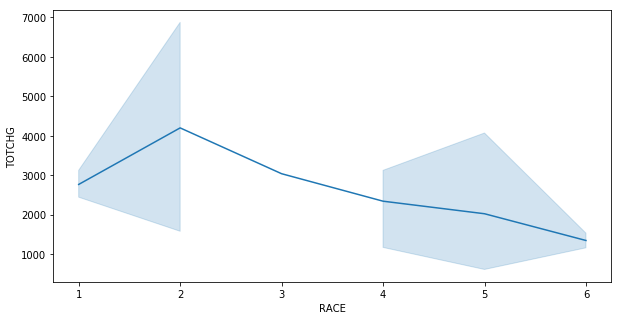

In [20]:
plt.figure(figsize=(10,5))
sns.lineplot(x=df.RACE, y =df.TOTCHG)
plt.show()

### Rescaling the original data to transform the data into Normal

In [21]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
df_Xd = sc.fit_transform(df)
df_sc = pd.DataFrame(df_Xd, columns= df.columns)

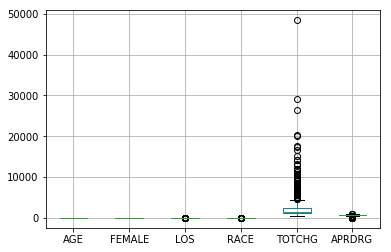

In [22]:
df.boxplot()
plt.show()

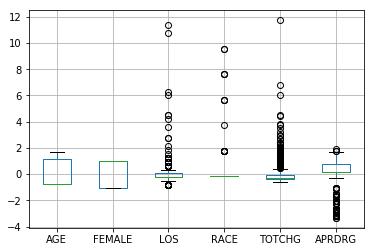

In [23]:
df_sc.boxplot()
plt.show()

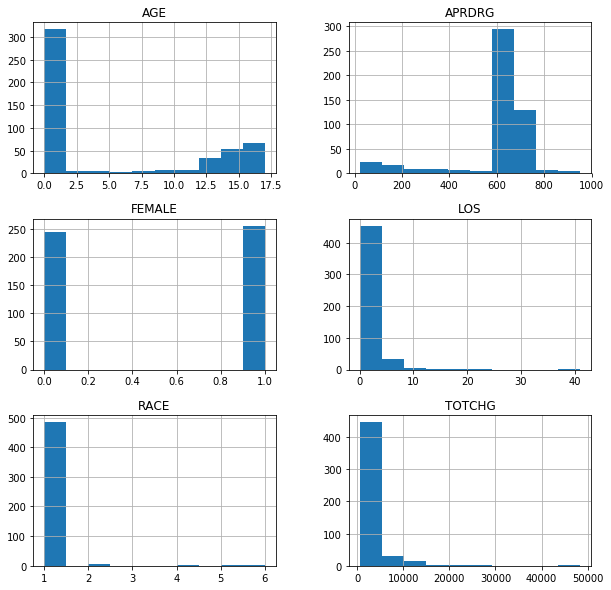

In [24]:
df.hist(bins=10, figsize=(10,10))
plt.show()


### The AGE category of people who frequent the hospital and has the maximum Expenditure

In [25]:
group_age = df.groupby('AGE')['TOTCHG'].sum()
group_age


AGE
0     678118
1      37744
2       7298
3      30550
4      15992
5      18507
6      17928
7      10087
8       4741
9      21147
10     24469
11     14250
12     54912
13     31135
14     64643
15    111747
16     69149
17    174777
Name: TOTCHG, dtype: int64

### Observations:

- The age groups are followed by 0 to 17 years.
- AGE 0 is frequently high visits to the hospital.
- AGE 0 having the more expenditure 6,78,118

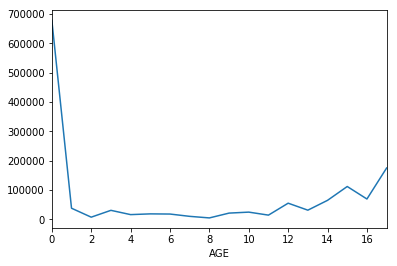

In [26]:
group_age.plot.line()
plt.show()

### The Expensive treatements, diagonise related group that has the maximum hospitalization and Expenditure

In [27]:
group_race = df.groupby('RACE')['TOTCHG','APRDRG'].sum()
group_race

,TOTCHG,APRDRG
RACE,,
1.0,1343128,299737
2.0,25213,3243
3.0,3041,626
4.0,7034,2147
5.0,6080,1036
6.0,2698,1391


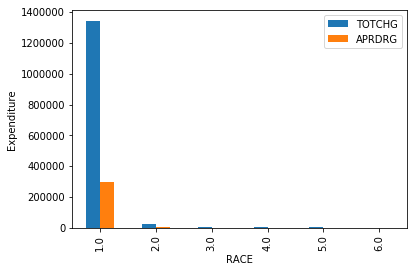

In [28]:
group_race.plot.bar()
plt.ylabel('Expenditure')
plt.show()

In [29]:
group_aprdrg = df.groupby('APRDRG')['TOTCHG'].sum()
group_aprdrg.tail(20)

APRDRG
640    437978
710      8223
720     14243
723      5289
740     11125
750      1753
751     21666
753     79542
754     59150
755     11168
756      1494
758     34953
760      8273
776      1193
811      3838
812      9524
863     13040
911     48388
930     26654
952      4833
Name: TOTCHG, dtype: int64

In [30]:
group_aprdrg_mean = df.groupby('APRDRG')['TOTCHG'].mean()
group_aprdrg_mean.tail(20)

APRDRG
640     1640.367041
710     8223.000000
720    14243.000000
723     2644.500000
740    11125.000000
750     1753.000000
751     1547.571429
753     2209.500000
754     1598.648649
755      859.076923
756      747.000000
758     1747.650000
760     4136.500000
776     1193.000000
811     1919.000000
812     3174.666667
863    13040.000000
911    48388.000000
930    13327.000000
952     4833.000000
Name: TOTCHG, dtype: float64

### Observations:
- APRDRG column 640 having high Expenditure 4,37,978

In [31]:
age_gender = df.groupby(['AGE','FEMALE'])['TOTCHG'].mean()
age_gender

AGE  FEMALE
0    0          2198.435294
     1          2221.781022
1    0          4327.750000
     1          1561.000000
2    0          7298.000000
3    0         11163.500000
     1          8223.000000
4    0          9230.000000
     1          6762.000000
5    0          7923.000000
     1         10584.000000
6    0          8964.000000
7    0          3362.333333
8    0          2370.500000
9    0         10573.500000
10   0          7769.666667
     1          1160.000000
11   0          1468.000000
     1          2721.000000
12   0          2592.166667
     1          4373.222222
13   0          1054.000000
     1          1922.785714
14   0          5741.000000
     1          1984.714286
15   0          7223.000000
     1          2079.842105
16   0          4629.833333
     1          1798.695652
17   0          3961.153846
     1          4931.280000
Name: TOTCHG, dtype: float64

In [32]:
import statsmodels.formula.api as sfa

In [33]:
model = sfa.ols(formula='LOS~AGE+FEMALE+RACE',data = df_sc).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    LOS   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     1.293
Date:                Thu, 05 Mar 2020   Prob (F-statistic):              0.276
Time:                        15:07:21   Log-Likelihood:                -707.52
No. Observations:                 500   AIC:                             1423.
Df Residuals:                     496   BIC:                             1440.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   7.286e-17      0.045   1.63e-15      1.0

C:\Users\kiran kumar\AppData\Roaming\Python\Python37\site-packages\statsmodels\compat\pandas.py:23: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  data_klasses = (pandas.Series, pandas.DataFrame, pandas.Panel)


### Observations:
- Length of stay is not depending on `AGE,FEMALE and RACE`

In [34]:
model1 = sfa.ols(formula='TOTCHG~AGE+FEMALE+APRDRG',data = df_sc).fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                 TOTCHG   R-squared:                       0.142
Model:                            OLS   Adj. R-squared:                  0.137
Method:                 Least Squares   F-statistic:                     27.44
Date:                Thu, 05 Mar 2020   Prob (F-statistic):           1.97e-16
Time:                        15:07:21   Log-Likelihood:                -671.08
No. Observations:                 500   AIC:                             1350.
Df Residuals:                     496   BIC:                             1367.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.031e-17      0.042   1.21e-15      1.0

In [35]:
model2 = sfa.ols(formula='TOTCHG~RACE',data = df_sc).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                 TOTCHG   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.1620
Date:                Thu, 05 Mar 2020   Prob (F-statistic):              0.687
Time:                        15:07:21   Log-Likelihood:                -709.39
No. Observations:                 500   AIC:                             1423.
Df Residuals:                     498   BIC:                             1431.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.031e-17      0.045   1.12e-15      1.0

In [36]:
model3 = sfa.ols(formula='TOTCHG~AGE+LOS+APRDRG',data = df_sc).fit()
print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:                 TOTCHG   R-squared:                       0.551
Model:                            OLS   Adj. R-squared:                  0.548
Method:                 Least Squares   F-statistic:                     202.7
Date:                Thu, 05 Mar 2020   Prob (F-statistic):           8.55e-86
Time:                        15:07:21   Log-Likelihood:                -509.41
No. Observations:                 500   AIC:                             1027.
Df Residuals:                     496   BIC:                             1044.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.031e-17      0.030   1.67e-15      1.0

In [37]:
model4 = sfa.ols(formula='TOTCHG~AGE+LOS+APRDRG+FEMALE+RACE',data = df_sc).fit()
print(model4.summary())

                            OLS Regression Results                            
Dep. Variable:                 TOTCHG   R-squared:                       0.554
Model:                            OLS   Adj. R-squared:                  0.549
Method:                 Least Squares   F-statistic:                     122.6
Date:                Thu, 05 Mar 2020   Prob (F-statistic):           3.43e-84
Time:                        15:07:22   Log-Likelihood:                -507.76
No. Observations:                 500   AIC:                             1028.
Df Residuals:                     494   BIC:                             1053.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.031e-17      0.030   1.67e-15      1.0

### Observations:
- In This DataFrame the data is Unbalanced.
- For the dependent variable TOTCHG the significant columns are `AGE,LOS,APRDRG`
- The remaining are unsignificant columns.
- R-Square value is 55% using significant columns.